In [60]:
from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [62]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [63]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [64]:
classes = np.unique(y_train)
nclasses = len(classes)
print("Output classes:",classes)
print("Totsl number of classes",nclasses)

Output classes: [0 1 2 3 4 5 6 7 8 9]
Totsl number of classes 10


Text(0.5, 1.0, 'Ground Truth 6')

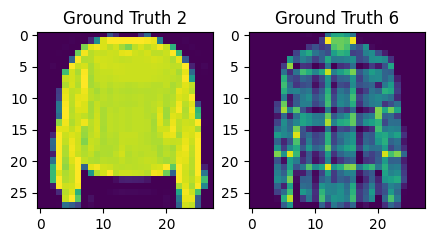

In [65]:
plt.figure(figsize=[5,5])

plt.subplot(1,2,1)
plt.imshow(x_train[7,:,:])
plt.title("Ground Truth {}".format(y_train[7]))

plt.subplot(1,2,2)
plt.imshow(x_test[7,:,:])
plt.title("Ground Truth {}".format(y_test[7]))

In [66]:
 #here first dimension represent no. of samples second and third dimension represent height and width and fourth dimension represent color chanel

In [67]:
x_train = x_train.reshape(-1,28,28,1)   
x_test = x_test.reshape(-1,28,28,1)
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [68]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train = x_train/ 255
x_test = x_test/ 255

In [69]:
x_train.shape

(60000, 28, 28, 1)

In [70]:
one_hot_y_train = to_categorical(y_train)
one_hot_y_test = to_categorical(y_test)
print("before",y_train[0])
print("After",one_hot_y_train[0])

before 9
After [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [71]:
from sklearn.model_selection import train_test_split
train_x,x_validate,train_label,valid_label = train_test_split(x_train,one_hot_y_train,test_size=0.2,random_state=13)

In [72]:
train_x.shape,x_validate.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [73]:
import keras
from keras.models import Sequential,Model
from keras.layers import Dense,MaxPool2D,Conv2D,Dropout,Flatten
# from keras.layers.normalization import BatchNormalization
from keras.layers import LeakyReLU

In [74]:
batch_size = 64
epochs = 20
num_classes = 10

In [75]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32,kernel_size=(3,3),activation="linear",input_shape = (28,28,1),padding="same"))
fashion_model.add(LeakyReLU(negative_slope = 0.1))
fashion_model.add(MaxPool2D(2,2,padding="same"))
fashion_model.add(Conv2D(64,(3,3),activation="linear",padding="same"))
fashion_model.add(LeakyReLU(negative_slope = 0.1))
fashion_model.add(MaxPool2D(pool_size=(2,2),padding="same"))
fashion_model.add(Conv2D(128,(3,3),activation="linear",padding="same"))
fashion_model.add(LeakyReLU(negative_slope = 0.1))
fashion_model.add(MaxPool2D(pool_size=(2,2),padding="same"))
fashion_model.add(Flatten())
fashion_model.add(Dense(128,activation="linear"))
fashion_model.add(LeakyReLU(negative_slope = 0.1))
fashion_model.add(Dense(num_classes,activation="softmax"))

In [76]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=["accuracy"])

In [77]:
fashion_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_26 (LeakyReLU)           │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_27 (LeakyReLU)           │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_28 (LeakyReLU)           │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_29 (LeakyReLU)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,234 (1.36 MB)

 Trainable params: 356,234 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
fasshion_train = fashion_model.fit(train_x,train_label,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_validate,valid_label))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 48ms/step - accuracy: 0.7510 - loss: 0.6832 - val_accuracy: 0.8840 - val_loss: 0.3196
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.8916 - loss: 0.2963 - val_accuracy: 0.8891 - val_loss: 0.3044
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 75s 46ms/step - accuracy: 0.9098 - loss: 0.2444 - val_accuracy: 0.9093 - val_loss: 0.2405
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 60ms/step - accuracy: 0.9212 - loss: 0.2110 - val_accuracy: 0.9161 - val_loss: 0.2316
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 76s 52ms/step - accuracy: 0.9343 - loss: 0.1752 - val_accuracy: 0.9183 - val_loss: 0.2281
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 57ms/step - accuracy: 0.9419 - loss: 0.1539 - val_accuracy: 0.9143 - val_loss: 0.2387
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 57ms/step - accuracy: 0.9480 - loss: 0.1397 - val_accuracy: 0.9223 - val_loss: 0.2253
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9581 - loss: 0.1114 - 

In [31]:
test_eval = fashion_model.evaluate(x_test,one_hot_y_test,verbose=0)

In [32]:
print("test loss:",test_eval[0])
print("test accuracy:",test_eval[1])

test loss: 0.4858708083629608
test accuracy: 0.9187999963760376


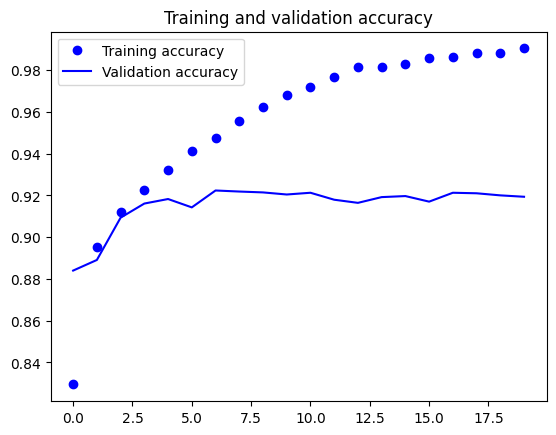

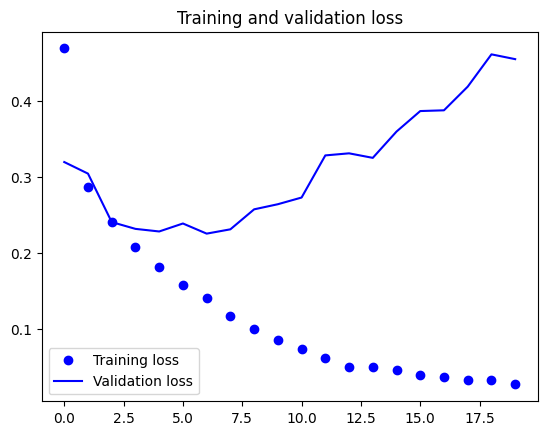

In [45]:
accuracy = fasshion_train.history['accuracy']
val_accuracy = fasshion_train.history['val_accuracy']
loss = fasshion_train.history['loss']
val_loss = fasshion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [78]:
fashion_model1 = Sequential()
fashion_model1.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model1.add(LeakyReLU(negative_slope=0.1))
fashion_model1.add(MaxPool2D((2, 2),padding='same'))
fashion_model1.add(Dropout(0.25))
fashion_model1.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model1.add(LeakyReLU(negative_slope=0.1))
fashion_model1.add(MaxPool2D(pool_size=(2, 2),padding='same'))
fashion_model1.add(Dropout(0.25))
fashion_model1.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model1.add(LeakyReLU(negative_slope=0.1))                  
fashion_model1.add(MaxPool2D(pool_size=(2, 2),padding='same'))
fashion_model1.add(Dropout(0.4))
fashion_model1.add(Flatten())
fashion_model1.add(Dense(128, activation='linear'))
fashion_model1.add(LeakyReLU(negative_slope=0.1))           
fashion_model1.add(Dropout(0.3))
fashion_model1.add(Dense(num_classes, activation='softmax'))


In [79]:
fashion_model1.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_30 (LeakyReLU)           │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_31 (LeakyReLU)           │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_32 (LeakyReLU)           │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_33 (LeakyReLU)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,234 (1.36 MB)

 Trainable params: 356,234 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
fashion_model1.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [83]:
fashion_train_dropout = fashion_model1.fit(train_x,train_label,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_validate,valid_label))


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 59ms/step - accuracy: 0.6660 - loss: 0.8969 - val_accuracy: 0.8524 - val_loss: 0.4036
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 62ms/step - accuracy: 0.8497 - loss: 0.4027 - val_accuracy: 0.8826 - val_loss: 0.3187
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 77s 54ms/step - accuracy: 0.8757 - loss: 0.3368 - val_accuracy: 0.8969 - val_loss: 0.2785
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 52s 69ms/step - accuracy: 0.8881 - loss: 0.3008 - val_accuracy: 0.9031 - val_loss: 0.2616
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 75s 60ms/step - accuracy: 0.8962 - loss: 0.2819 - val_accuracy: 0.9118 - val_loss: 0.2463
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 86s 65ms/step - accuracy: 0.8999 - loss: 0.2681 - val_accuracy: 0.9123 - val_loss: 0.2421
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 63ms/step - accuracy: 0.9049 - loss: 0.2574 - val_accuracy: 0.9154 - val_loss: 0.2339
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 63ms/step - accuracy: 0.9100 - loss: 0.2408 - 

In [86]:
fashion_model.save("fashion_model_dropout.keras")

In [96]:
test_eval1 = fashion_model.evaluate(x_test,one_hot_y_test,verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0960 - loss: 2.3002


In [97]:
print('Test loss:', test_eval1[0])
print('Test accuracy:', test_eval1[1])

Test loss: 2.299572467803955
Test accuracy: 0.09790000319480896


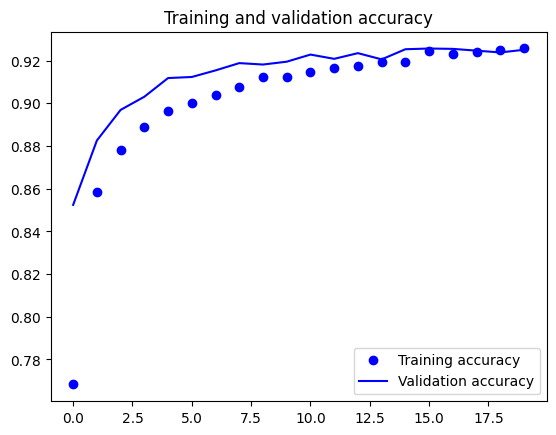

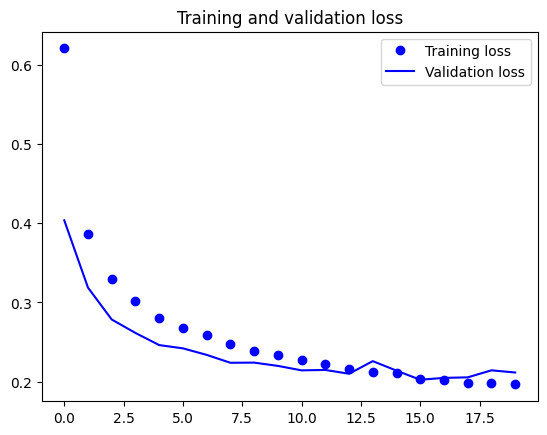

In [98]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [100]:
predicted_classes = fashion_model1.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
